In [ ]:
!pip install spacy
!pip install seaborn
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


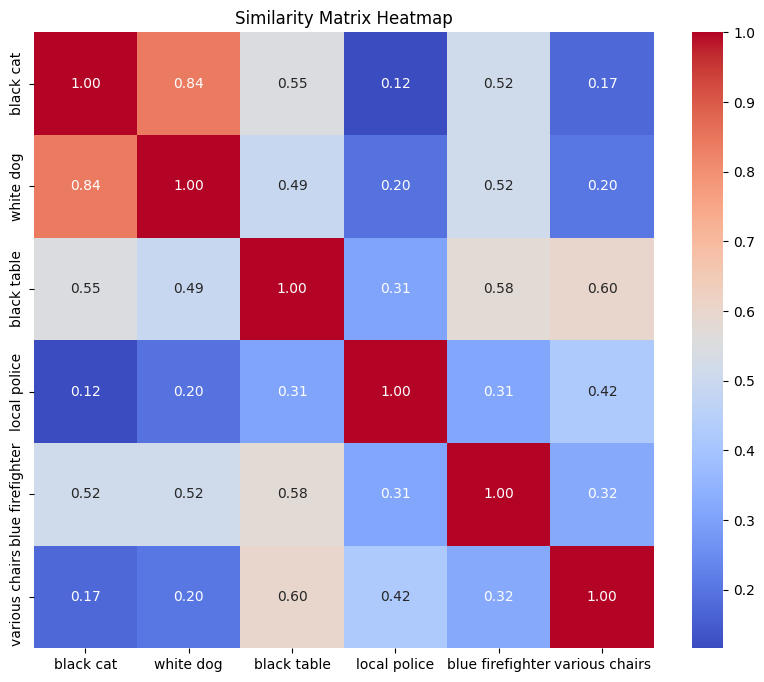

In [ ]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el modelo preentrenado de spaCy
nlp = spacy.load("en_core_web_md")

# Frases para analizar
phrases = [
    "black cat", "white dog", "black table",
    "local police", "blue firefighter", "various chairs"
]

# Convertir frases en embeddings usando spaCy
embeddings = np.array([nlp(phrase).vector for phrase in phrases])

# Calcular la similitud del coseno entre los embeddings de las frases
similarity_matrix = cosine_similarity(embeddings)

# Crear un DataFrame con la matriz de similitud
df_similarity = pd.DataFrame(similarity_matrix, index=phrases, columns=phrases)

# Visualizar la matriz de similitud como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_similarity, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Similarity Matrix Heatmap")
plt.show()

# Ahora usando estos datos vamos a ver como se calcula la proximidad:

In [ ]:
import spacy
import numpy as np

# Cargar el modelo preentrenado de spaCy
nlp = spacy.load("en_core_web_md")

# Frases para analizar
phrases = [
    "black cat", "white dog", "black table",
    "local police", "blue firefighter", "various chairs"
]

# Convertir frases en embeddings usando spaCy y almacenar en un diccionario
embeddings_dict = {phrase: nlp(phrase).vector for phrase in phrases}

# Imprimir los vectores de embeddings
for phrase, vector in embeddings_dict.items():
    print(f"Vector for '{phrase}':\n{vector}\n")


Vector for 'black cat':
[-1.01785004e+00  2.20186520e+00 -5.07940006e+00 -3.22979975e+00
  9.68601048e-01 -8.05999994e-01  4.95004654e-03  2.41239977e+00
  9.61499959e-02  2.83115005e+00  7.36399984e+00  3.13180029e-01
 -1.98291016e+00  1.59779441e+00  3.42195487e+00 -2.00945520e+00
 -1.63384509e+00 -9.16199982e-01  3.54169989e+00  2.42399991e-01
 -3.69429994e+00  3.57084990e+00 -1.55970001e+00 -5.85330009e+00
 -1.44100010e-01 -1.89625001e+00 -3.26399994e+00  7.23249912e-01
 -1.88870001e+00 -2.27505016e+00 -3.19385004e+00  8.15994978e-01
 -3.69685006e+00 -5.34349978e-01 -2.50005007e+00 -4.45384026e+00
  1.20441997e+00  9.35254991e-01  1.74884498e+00 -2.80119991e+00
 -1.64941490e-01 -3.78919983e+00  2.51690006e+00  3.01789999e+00
  1.55675006e+00  2.16647506e+00 -1.06600046e-01 -2.29929996e+00
 -9.44628477e-01  2.05550003e+00 -1.45491993e+00  7.72315025e+00
  1.09759998e+00  8.60809922e-01 -1.43269300e+00  2.59669995e+00
  4.80099964e+00  2.02108502e+00  1.59858501e+00  7.98099995e-01
 

# Y ahora mediremos dicha distancia:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Función para calcular la similitud del coseno entre dos vectores
def cosine_sim(vec1, vec2):
    # Reshape los vectores a 1xN
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

# Ejemplo de cálculo de similitud entre "black cat" y "white dog"
similarity = cosine_sim(embeddings_dict["black cat"], embeddings_dict["white dog"])
print(f"Similarity between 'black cat' and 'white dog': {similarity:.2f}")


Similarity between 'black cat' and 'white dog': 0.84
